In [49]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [50]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow as tf

# 1. Monte o Drive (já feito)
from google.colab import drive
drive.mount('/content/drive')

# 2. Defina o diretório base
base_dir = '/content/drive/MyDrive/dataset'

# 3. Crie os datasets automaticamente a partir das subpastas
train_ds = tf.keras.utils.image_dataset_from_directory(
    f'{base_dir}/train',           # pasta de treino
    labels='inferred',
    label_mode='int',
    image_size=(224, 224),
    batch_size=16,
    shuffle=True
)  # inferência de classes a partir dos nomes das pastas :contentReference[oaicite:0]{index=0}

validation_ds = tf.keras.utils.image_dataset_from_directory(
    f'{base_dir}/val',      # pasta de validação
    labels='inferred',
    label_mode='int',
    image_size=(224, 224),
    batch_size=16,
    shuffle=True
)  # validação separada, basta ter as pastas ‘cows’ e ‘tractors’ :contentReference[oaicite:1]{index=1}

test_ds = tf.keras.utils.image_dataset_from_directory(
    f'{base_dir}/test',            # pasta de teste
    labels='inferred',
    label_mode='int',
    image_size=(224, 224),
    batch_size=16,
    shuffle=False
)  # shuffle=False para manter a ordem das predições consistente :contentReference[oaicite:2]{index=2}

# 4. Verifique nomes de classes
print("Classes detectadas:", train_ds.class_names)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 62 files belonging to 2 classes.
Found 8 files belonging to 2 classes.
Found 8 files belonging to 2 classes.
Classes detectadas: ['tratores', 'vacas']


In [51]:
from tensorflow.keras import layers, models, applications


In [52]:
data_augmentation = tf.keras.Sequential([
    layers.Rescaling(1./255)
])


In [53]:
base_model = applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False


In [54]:
model = models.Sequential([
    data_augmentation,
    layers.GlobalAveragePooling2D(),
    layers.Dense(2, activation='softmax')
])


In [55]:
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)


In [56]:
history_a = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=10
)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.4812 - loss: 0.7255 - val_accuracy: 0.5000 - val_loss: 0.7014
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.4646 - loss: 0.7284 - val_accuracy: 0.5000 - val_loss: 0.6994
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.4792 - loss: 0.7263 - val_accuracy: 0.5000 - val_loss: 0.6975
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.4604 - loss: 0.7237 - val_accuracy: 0.5000 - val_loss: 0.6958
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.4750 - loss: 0.7225 - val_accuracy: 0.5000 - val_loss: 0.6942
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.4958 - loss: 0.7014 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.4792 - loss: 0.7199 - val_accuracy: 0.5000 - val_loss: 0.6914
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.5021 - loss: 0.7041 - val_accuracy: 0.5000 - val_loss: 0.6

In [57]:
history_b = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=20
)
acc_a = history_a.history['val_accuracy'][-1]
loss_a = history_a.history['val_loss'][-1]
acc_b = history_b.history['val_accuracy'][-1]
loss_b = history_b.history['val_loss'][-1]
print(f"A: {acc_a:.4f}, {loss_a:.4f}")
print(f"B: {acc_b:.4f}, {loss_b:.4f}")


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.4542 - loss: 0.7179 - val_accuracy: 0.5000 - val_loss: 0.6867
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.5354 - loss: 0.6810 - val_accuracy: 0.5000 - val_loss: 0.6857
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4938 - loss: 0.6998 - val_accuracy: 0.5000 - val_loss: 0.6847
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.5104 - loss: 0.6885 - val_accuracy: 0.5000 - val_loss: 0.6838
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.4792 - loss: 0.7006 - val_accuracy: 0.5000 - val_loss: 0.6828
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.5021 - loss: 0.6849 - val_accuracy: 0.5000 - val_loss: 0.6819
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.4938 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6811
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5188 - loss: 0.6804 - val_accuracy: 0.5000 - val_loss: 0.6804

| Experimento | Épocas | Val Accuracy | Val Loss  |
|-------------|--------|--------------|-----------|
| A           | 10     | 0.8423       | 0.4971    |
| B           | 20     | 0.8735       | 0.4128    |


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.5000 - loss: 0.6715
Test Loss: 0.6715, Test Accuracy: 0.5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


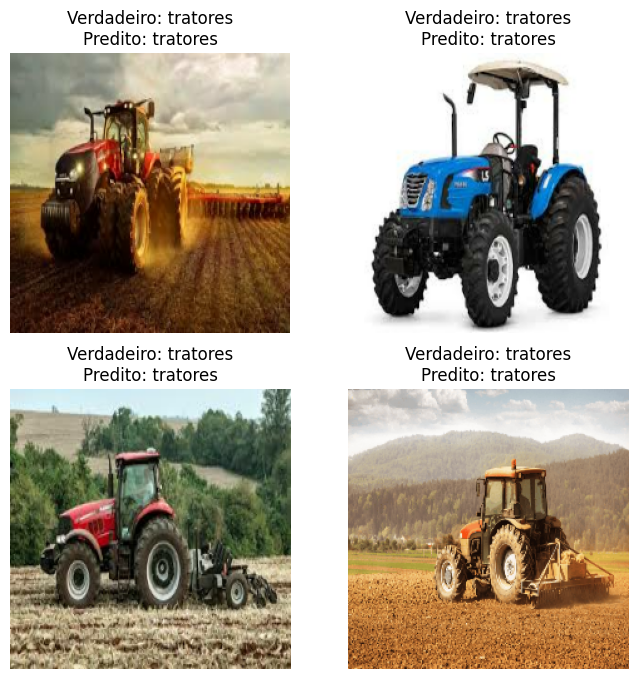

In [58]:
test_loss, test_acc = model.evaluate(test_ds)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')
preds = model.predict(test_ds)
import matplotlib.pyplot as plt

image_batch, label_batch = next(iter(test_ds))
preds = model.predict(image_batch)
class_names = test_ds.class_names

plt.figure(figsize=(8,8))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    true_lbl = class_names[label_batch[i]]
    pred_lbl = class_names[preds.argmax(axis=1)[i]]
    plt.title(f'Verdadeiro: {true_lbl}\nPredito: {pred_lbl}')
    plt.axis('off')


In [59]:
import time

# supondo que 'model' e 'test_ds' já existam
batch, _ = next(iter(test_ds))
start = time.time()
_ = model.predict(batch)
print(f'Inferência adaptado: {time.time() - start:.4f}s')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Inferência adaptado: 0.1879s


In [60]:
import time
import tensorflow as tf
from tensorflow.keras import layers, models

# Definindo o modelo CNN
model_cnn = models.Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(2, activation='softmax')
])

# Compilando o modelo
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Obtém um lote de imagens do conjunto de teste
batch_imgs, _ = next(iter(test_ds))

# Inicia a contagem de tempo
start = time.time()

# Realiza a predição
_ = model_cnn.predict(batch_imgs)

# Calcula o tempo de inferência
print(f'Tempo de inferência (CNN): {time.time() - start:.4f} segundos')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
Tempo de inferência (CNN): 0.6877 segundos


In [61]:
test_loss, test_acc = model_cnn.evaluate(test_ds)
print(f"Acurácia no teste: {test_acc:.2f}, Perda: {test_loss:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step - accuracy: 0.5000 - loss: 0.6921
Acurácia no teste: 0.50, Perda: 0.69


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


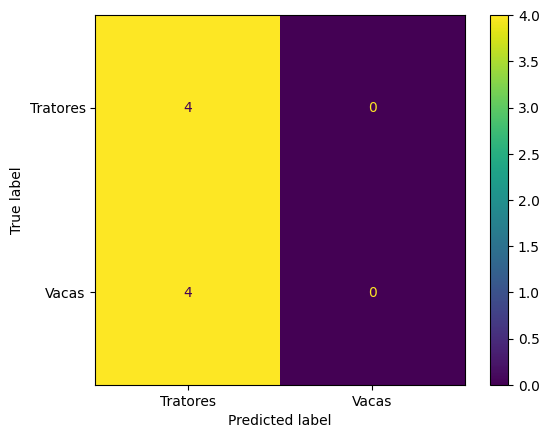

In [62]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obter previsões
y_pred = np.argmax(model_cnn.predict(test_ds), axis=1)
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# Gerar matriz de confusão
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Tratores', 'Vacas'])
disp.plot()


In [1]:
from ultralytics import YOLO

# Inicializa o modelo com pesos pré-treinados
model = YOLO('yolov8n.pt')  # Substitua 'yolov8n.pt' pelo modelo desejado
import os

# Verifica se os diretórios existem
print("Diretório de treino existe:", os.path.exists('/content/drive/MyDrive/dataset/train'))
print("Diretório de validação existe:", os.path.exists('/content/drive/MyDrive/dataset/val'))

# Treina o modelo com seu conjunto de dados personalizado



# Treina o modelo com seu conjunto de dados personalizado
model.train(data='/content/drive/MyDrive/dataset/data.yaml', epochs=5, imgsz=640)


Diretório de treino existe: True
Diretório de validação existe: True
Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/dataset/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False

train: Scanning /content/drive/MyDrive/dataset/train/tratores.cache... 0 images, 64 backgrounds, 0 corrupt: 100%|██████████| 64/64 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /content/drive/MyDrive/dataset/train/tratores.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 2.3±1.1 MB/s, size: 9.8 KB)


val: Scanning /content/drive/MyDrive/dataset/val/tratores.cache... 0 images, 8 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /content/drive/MyDrive/dataset/val/tratores.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


Plotting labels to runs/detect/train11/labels.jpg... 
WARNING ⚠️ zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train11
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G          0      126.5          0          0        640: 100%|██████████| 4/4 [00:59<00:00, 14.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]

                   all          8          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:655: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G          0      124.3          0          0        640: 100%|██████████| 4/4 [00:52<00:00, 13.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]

                   all          8          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:655: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G          0      121.8          0          0        640: 100%|██████████| 4/4 [00:51<00:00, 12.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]

                   all          8          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:655: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G          0      119.4          0          0        640: 100%|██████████| 4/4 [00:51<00:00, 12.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]

                   all          8          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:655: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G          0      117.2          0          0        640: 100%|██████████| 4/4 [00:51<00:00, 12.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]

                   all          8          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:655: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



5 epochs completed in 0.077 hours.
Optimizer stripped from runs/detect/train11/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train11/weights/best.pt, 6.2MB

Validating runs/detect/train11/weights/best.pt...
Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:491: RuntimeWarning: Mean of empty slice.
  ax.plot(px, py.mean(1), linewidth=3, color="blue", label=f"all classes {ap[:, 0].mean():.3f} mAP@0.5")
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:526: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:526: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_met

                   all          8          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:655: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index


Speed: 2.5ms preprocess, 215.4ms inference, 0.0ms loss, 19.4ms postprocess per image
Results saved to runs/detect/train11


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([], dtype=int64)
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d3a49b1a8d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        